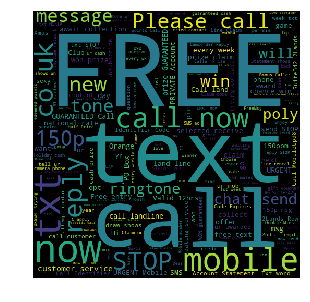

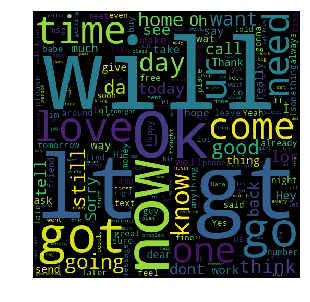

In [33]:
import pandas as pd
import nltk
import _pickle as cPickle
import sys
from wordcloud import WordCloud
import seaborn
import numpy as np
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer,PorterStemmer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, confusion_matrix,roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV


spam_data = pd.read_csv("spam.csv",encoding = "latin1")
spam_data.rename(columns={'v1':'label','v2':'message'},inplace = True)
spam_data = spam_data[["label","message"]]
spam_data["label"] = spam_data["label"].apply(lambda x: 0 if(x=="ham") else 1)

spam_data["length"] = spam_data["message"].map(lambda text:len(text))
spam_data_labels = spam_data["label"]
spam_data_value = spam_data["message"]
spam_data_value = spam_data_value.str.lower()
X_train, X_test,y_train,y_test = train_test_split(spam_data_value,spam_data_labels,random_state=0)

# spam_data.length.plot(bins=20,kind="hist")

# spam_data.hist(column = "length",bins=20,by = "v1")
# plt.show()
# def ensureUtf(s):
#     try:
#         if type(s) == unicode:
#             return s.encode('utf8', 'ignore')
#     except: 
#             return str(s)

spam_words = ' '.join(list(spam_data[spam_data['label']==1]["message"]))
spam_wc = WordCloud(width=512,height=512).generate(spam_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(spam_wc)

plt.figure()

non_spam_words = ' '.join(list(spam_data[spam_data['label']==0]["message"]))
non_spam_wc = WordCloud(width=512,height=512).generate(non_spam_words)
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(non_spam_wc)

In [34]:

vect = TfidfVectorizer(min_df=5,stop_words = 'english',analyzer='char_wb',ngram_range = (1,3)).fit(X_train)


In [6]:
X_train_transform = vect.transform(X_train)
X_test_transform = vect.transform(X_test)
# clf = SVC(C=10000).fit(X_train_transform,y_train)
# pred = clf.predict(X_test_transform)
# auc_score = roc_auc_score(y_test,pred)
param = [{'C':[10,100,1000,10000],'kernel':['linear']},
                {'C':[1,10,100,1000,10000], 'gamma':[0.0001,0.001],'kernel':['rbf']}]
clf = GridSearchCV(SVC(),param_grid = param, cv = 5)
clf.fit(X_train_transform,y_train)
# confusion_matrix = confusion_matrix(y_test,pred)
print(clf.best_params_)
print(clf.best_score_)
# d = list(pd.read_table("test.txt"))
# clf.predict(vect.transform(d))

{'C': 10000, 'gamma': 0.001, 'kernel': 'rbf'}
0.9901890404402968


In [21]:
spam_detector = SVC(C=10000,gamma=0.001,kernel='rbf').fit(X_train_transform,y_train)
prediction = spam_detector.predict(X_test_transform)
auc_score = roc_auc_score(y_test,prediction)
print(auc_score)

with open('spam_detector.pkl','wb') as fout:
    cPickle.dump(spam_detector,fout)
spam_detector_reloaded = cPickle.load(open('spam_detector.pkl','rb'))   


0.9754851196034158


array([1])

In [25]:
# input_file = sys.argv[1]
# i = list(pd.read_table(input_file))
# print(spam_detector.predict(vect.transform(i)))
d = list(pd.read_table("test.txt"))
spam_detector_reloaded.predict(vect.transform(d))

array([1])